This notebook tries to check if the recorded coordinates are well interpreted

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import csv
import os
import numpy as np
from matplotlib import pyplot as plt
import Augment
import imageProcessing as ip
import random
from Config import Config

In [20]:
# Open the CSV file and read its contents into a dictionary
# The stored data is: picture_name, x1, y1, x2, y2 
with open(Config.coords_file_path, mode='r') as file:
    reader = csv.DictReader(file)  # Use DictReader to automatically map rows to dictionaries
    data = [row for row in reader]  # Convert each row into a dictionary and store in a list

[[33.77446365356445, 15.742574691772461], [77.94966888427734, 27.524751663208008]]
(80, 120, 3)


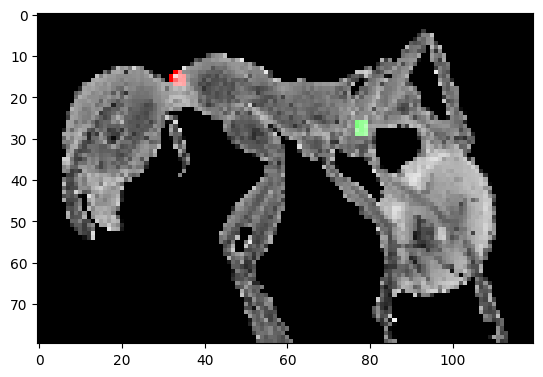

[[39.09650802612305, 17.02970314025879], [67.92607879638672, 27.22772216796875]]
(80, 120, 3)


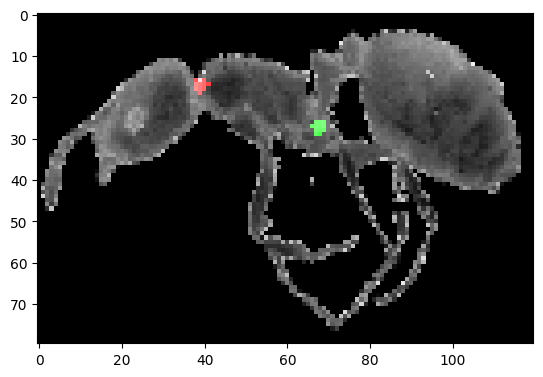

[[24.7858943939209, 12.87128734588623], [71.13349914550781, 30.99009895324707]]
(80, 120, 3)


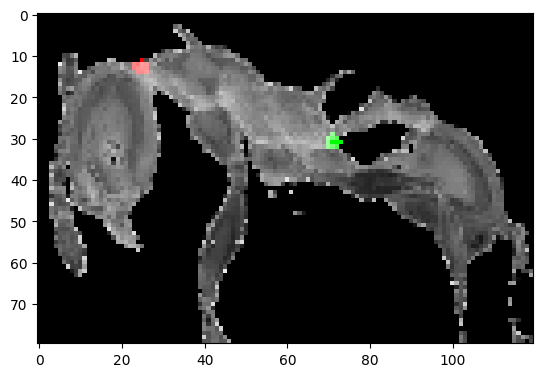

[[39.041473388671875, 18.81188201904297], [63.815670013427734, 31.78217887878418]]
(80, 120, 3)


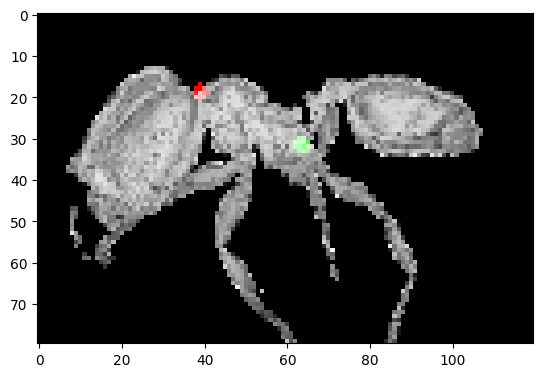

[[20.123565673828125, 20.49505043029785], [70.7502212524414, 30.891088485717773]]
(80, 120, 3)


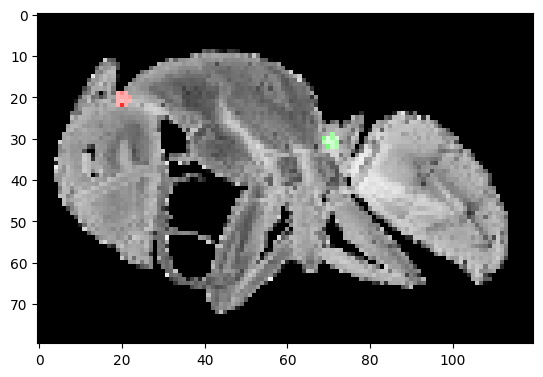

[[35.38835144042969, 13.663366317749023], [67.13592529296875, 23.76237678527832]]
(80, 120, 3)


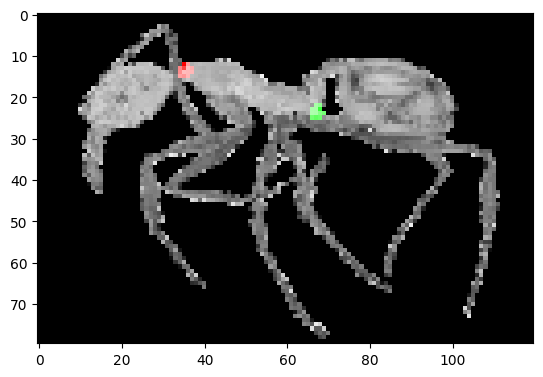

[[29.07735252380371, 13.366336822509766], [72.13420104980469, 26.435644149780273]]
(80, 120, 3)


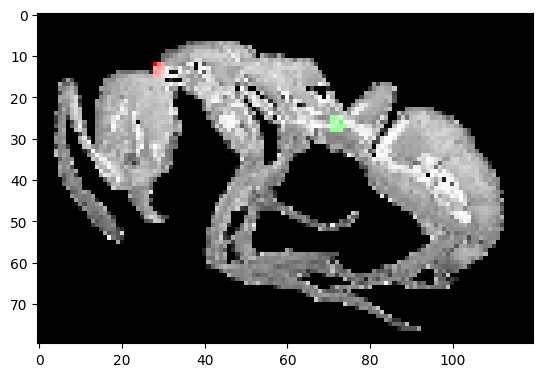

[[18.37638282775879, 23.26732635498047], [74.83394622802734, 36.930694580078125]]
(80, 120, 3)


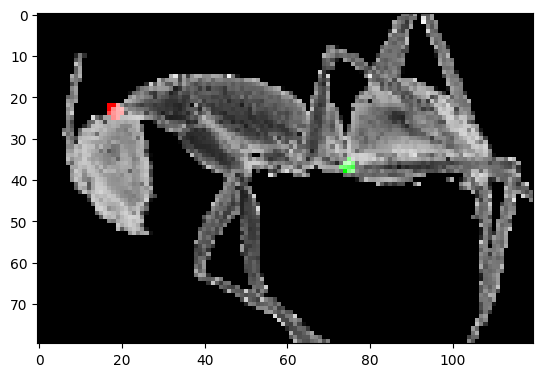

[[40.79161834716797, 26.23762321472168], [71.31548309326172, 39.801979064941406]]
(80, 120, 3)


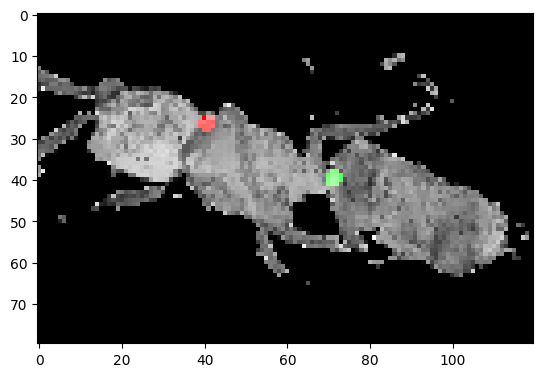

[[28.421052932739258, 21.18811798095703], [64.78777313232422, 28.01980209350586]]
(80, 120, 3)


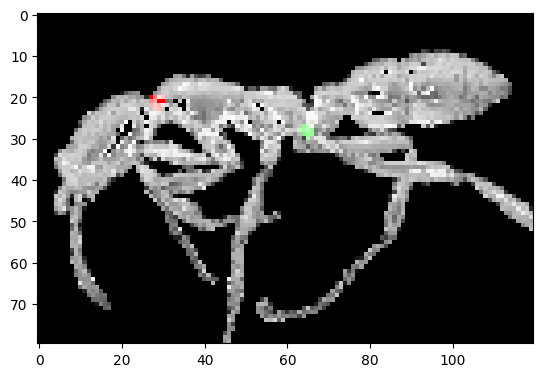

[[37.12954330444336, 12.574257850646973], [71.12767791748047, 19.20792007446289]]
(80, 120, 3)


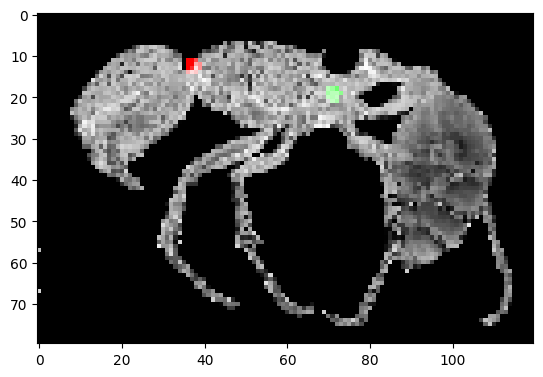

[[19.582542419433594, 12.079208374023438], [71.61290740966797, 24.455446243286133]]
(80, 120, 3)


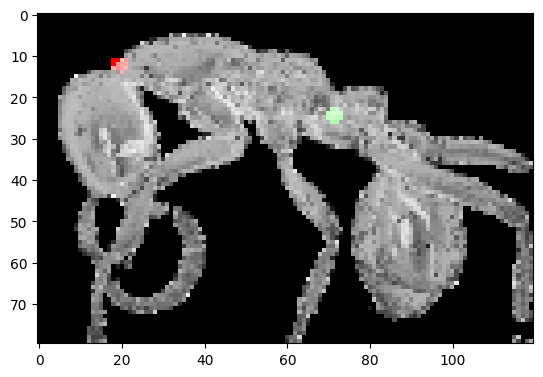

[[41.267215728759766, 22.079208374023438], [73.71900939941406, 35.94059371948242]]
(80, 120, 3)


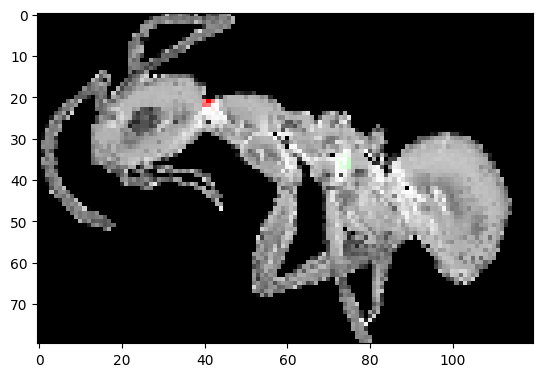

[[35.240962982177734, 12.772276878356934], [67.68072509765625, 29.405941009521484]]
(80, 120, 3)


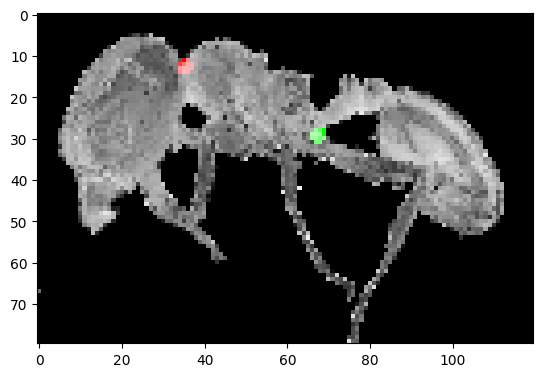

[[26.79069709777832, 14.554455757141113], [68.87442016601562, 27.22772216796875]]
(80, 120, 3)


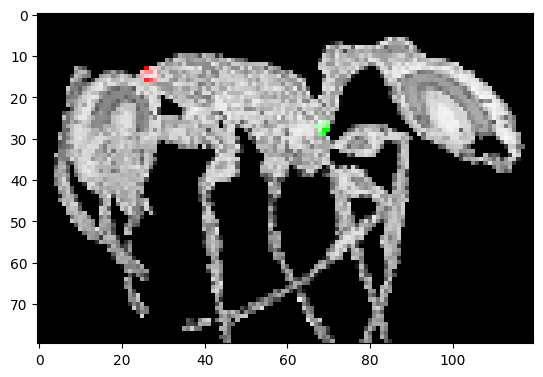

In [21]:
# Add the image to the image_data dictionnary (seemed more convenient but might actually be stupid)
for image_data in random.sample(data, 15):
    name = image_data["Image Name"]
    img_path = os.path.join("clean", name)
    # Replace the suffix with .png
    base, _ = os.path.splitext(img_path)
    img_path = f"{base}.png"
    x1, y1 = image_data["x1"], image_data["y1"]
    x2, y2 = image_data["x2"], image_data["y2"]
    #x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    img, keypoints = Augment.prepare_for_model(img_path, [(x1, y1), (x2, y2)])

    print(keypoints)

    if len(keypoints) == 2:
        point1, point2 = keypoints[0], keypoints[1]
        rgb = ip.add_point_channels(img, point1, point2)
        print(rgb.shape)

        plt.plot()
        plt.imshow(rgb, cmap = "gray")
        plt.show()


Success !!